<center>---</center>
<center><span style="color:MidnightBlue; opacity: 0.8"><font size="6"><b>PHÂN TÍCH TOP RATED GAME TRÊN GOOGLE PLAY</b></font></span></center>
<center>DỰA TRÊN DATA NGÀY 09/06/2021</center>

## Xin chào!

- Bài phân tích dựa trên dataset **Top Games On Google Play Store từ Kaggle** (https://www.kaggle.com/dhruvildave/top-play-store-games)
- Dataset này bao gồm top những games có số lượt rating từ người dùng cao nhất theo từng thể loại game trên Google Play Store. Mỗi thể loại có 100 games được liệt kê.

**Các bước phân tích:**
- [Import library & Input data](#section-one)
- [Clean data](#section-two)
- [Đặt và giải quyết các câu hỏi](#section-three)
 - [Q1: Số lượt ratings có thể hiện thành công của 1 tựa game?](#section-four)
 - [Q2: Đặc điểm của từng thể loại game là gì?](#section-five)
 - [Q3: Đặc điểm của các tựa game trả phí là gì?](#section-six)

## Import library & Input data<a id="section-one"></a>

### Import library

In [265]:
# Numpy và Pandas cho việc phân tích data
import numpy as np
import pandas as pd

# Matplotlib, seaborn để vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

#Ignor warning cho notebook dễ nhìn hơn
import warnings
warnings.filterwarnings('ignore')

### Input data

In [266]:
df = pd.read_csv("android-games.csv")
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


## Clean data<a id="section-three"></a>

In [267]:
# Thông tin cơ bản về dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


Ta có thể thấy file data không có null, tuy nhiên cột số lượng install đang ở dạng 'object', cần chuyển thành dạng số để tính toán

In [268]:
# B1: tạo fuction để chuyển M(million) thành 1,000,000; k thành 1,000
def transform(install):
    if install.split()[1] =='M':
        return int(float(install.split()[0]))*1000000
    else:
        return int(float(install.split()[0]))*1000    

In [269]:
# B2: Áp dụng function trên để thay đổi format cột 'installs'
df['installs'] = df['installs'].apply(lambda x: transform(x))
df.head() # Kết quả sau khi đã thay đổi

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500000000,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500000000,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100000000,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100000000,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500000000,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [270]:
# Số lượng các tựa game theo category
df.groupby('category').count()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
category,,,,,,,,,,,,,,
GAME ACTION,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME ADVENTURE,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME ARCADE,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME BOARD,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME CARD,126,126,126,126,126,126,126,126,126,126,126,126,126,126
GAME CASINO,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME CASUAL,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME EDUCATIONAL,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME MUSIC,100,100,100,100,100,100,100,100,100,100,100,100,100,100


2 thể loại GAME CARD và GAME WORD đang có số tựa game trên 100 => Có dữ liệu trùng lặp

In [271]:
# Xóa các dòng có cùng rank, cùng category
df.drop_duplicates(subset=['rank', 'category'], inplace=True)

In [272]:
# Kiểm tra lại thông tin sau khi xóa trùng lặp
df.groupby('category').count()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
category,,,,,,,,,,,,,,
GAME ACTION,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME ADVENTURE,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME ARCADE,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME BOARD,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME CARD,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME CASINO,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME CASUAL,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME EDUCATIONAL,100,100,100,100,100,100,100,100,100,100,100,100,100,100
GAME MUSIC,100,100,100,100,100,100,100,100,100,100,100,100,100,100


## Đặt và giải quyết các câu hỏi<a id="section-three"></a>

### Số lượt ratings có thể hiện thành công của 1 tựa game?<a id="section-four"></a>

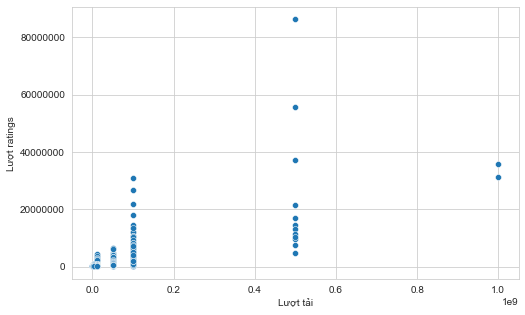

In [273]:
# Mối liên hệ giữa số lượt tải và số lượt ratings
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style("whitegrid")
g = sns.scatterplot(y='total ratings',x='installs',data=df)
g.set(xlabel='Lượt tải', ylabel='Lượt ratings')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

- Không có mối liên hệ rõ ràng giữa số lượt tải và số lượt ratings.

In [274]:
# Game có số lượt ratings nhiều nhất
df[df['total ratings'] == df['total ratings'].max()]

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500000000,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False


In [275]:
# Game có số lượt tải nhiều nhất
df[df['installs'] == df['installs'].max()]

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
200,1,Subway Surfers,35665901,1000000000,4,0.5,1.0,0.0,GAME ARCADE,27138572,3366600,1622695,814890,2723142,False
626,1,Candy Crush Saga,31367945,1000000000,4,0.9,1.6,0.0,GAME CASUAL,23837448,4176798,1534041,486005,1333650,False


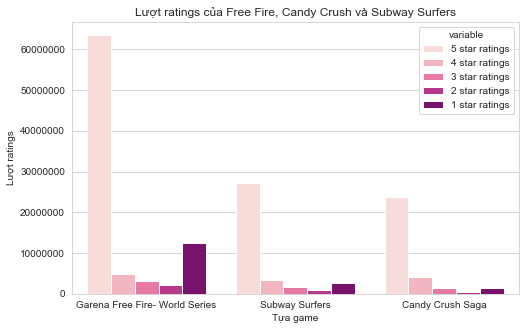

In [276]:
df1 = df[(df['title'] == 'Garena Free Fire- World Series') | (df['title'] == 'Subway Surfers') | (df['title'] == 'Candy Crush Saga')]
df_a = pd.melt(df1,id_vars=['title'],value_vars=['5 star ratings','4 star ratings','3 star ratings','2 star ratings','1 star ratings'])
fig, ax = plt.subplots(figsize=(8,5))
g = sns.barplot(x='title',y='value',hue='variable',data=df_a, palette = "RdPu")
plt.ticklabel_format(style='plain', axis='y')
g.set(xlabel='Tựa game', ylabel='Lượt ratings', title = 'Lượt ratings của Free Fire, Candy Crush và Subway Surfers')
plt.show()

- Free Fire có lượt ratings 5 sao gấp đôi, 2/3/4 sao gần như tương tự hai tựa game còn lại và lượt ratings 1 sao gấp 6 lần.

**Kết luận:** Số lượt ratings không phải thước đo hoàn hảo cho sự thành công hay nổi tiếng của 1 tựa game. Lượt ratings nhiều đơn giản chỉ là do cộng đồng người chơi game đó chăm để lại review game. Để đánh giá 1 game có đang làm tốt hay không, cần chú trọng các chỉ số khác như số lượt tải, rating trung bình, mức độ tăng trưởng qua các thời kỳ,...

### Đặc điểm của từng thể loại game là gì?<a id="section-five"></a>

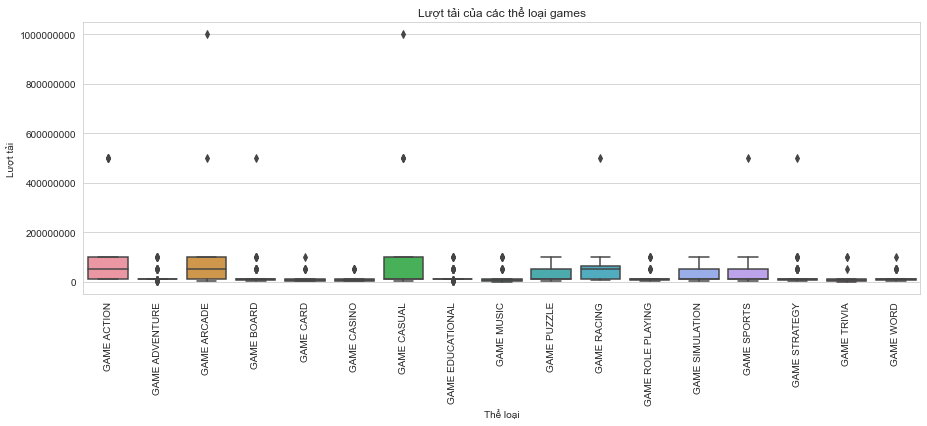

In [277]:
# Số lượt tải của các game theo từng thể loại
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,5))
g = sns.boxplot(x='category',y='installs',data=df)
g.set(xlabel='Thể loại', ylabel='Lượt tải', title = 'Lượt tải của các thể loại games')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

- Hầu hết các game đều có lượt tải ở mức từ 100 triệu lượt trở xuống.
- Rất ít game có thể đạt mốc 500 triệu lượt tải. Mốc 1 tỉ lượt chỉ có 2 đại diện là Candy Crush và Subway Surfer.

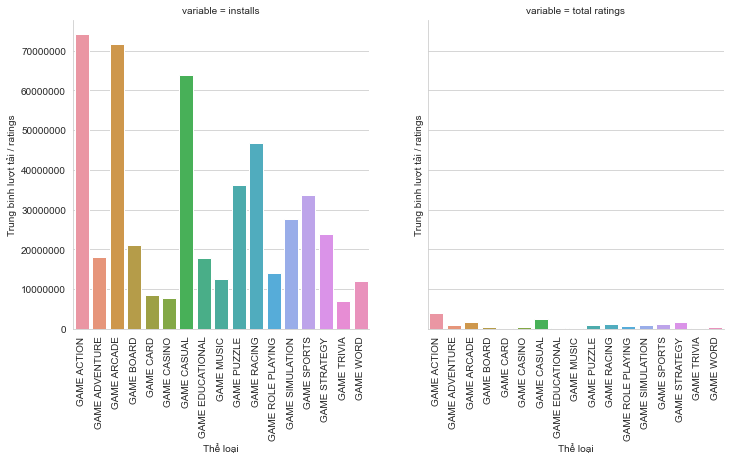

In [278]:
# Trung bình số lượt tải và số lượt ratings theo từng thể loại game
df2 = pd.melt(df,id_vars=['category'],value_vars=['total ratings','installs'])
df_cat = df2.groupby(['category','variable']).mean()
df_cat.reset_index(inplace=True)
g = sns.catplot(x='category',y='value',col='variable',data=df_cat,kind="bar")
g.set_xticklabels(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
g.set(xlabel='Thể loại', ylabel='Trung bình lượt tải / ratings')
plt.show()

- Top 3 thể loại có số lượt tải và số lượt ratings cao nhất: **Game action, Game arcade và Game casual**.

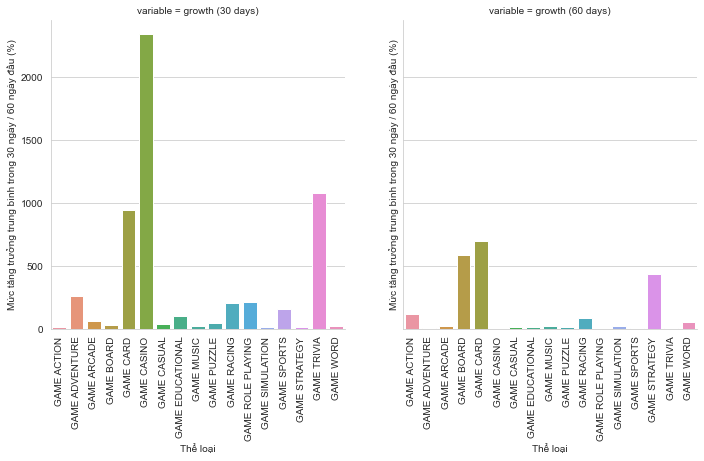

In [279]:
# Mức tăng trưởng trung bình của các thể loại game trong tháng đầu và tháng thứ 2 ra mắt
df3 = pd.melt(df,id_vars=['category'],value_vars=['growth (30 days)','growth (60 days)'])
df_cat = df3.groupby(['category','variable']).mean()
df_cat.reset_index(inplace=True)
g = sns.catplot(x='category',y='value',col='variable',data=df_cat,kind="bar")
g.set_xticklabels(rotation=90)
g.set(xlabel='Thể loại', ylabel='Mức tăng trưởng trung bình trong 30 ngày / 60 ngày đầu (%)')
plt.show()

- Top 3 thể loại có mức tăng trưởng tháng đầu ra mắt cao nhất: **Game card, Game Casino, Game Trivia**.
- Top 3 thể loại có mức tăng trưởng tháng thứ hai ra mắt cao nhất: **Game board, Game card, Game strategy**.

**Kết luận:** Thể loại Game card, Game board, Game trivia thường có sự phát triển bùng nổ vào giai đoạn đầu ra mắt. Thể loại Game action, Game arcade và Game casual sẽ phát triển tốt về dài hạn.

### Đặc điểm của các tựa game trả phí là gì?<a id="section-six"></a>

In [280]:
# Bảng tổng hợp các tựa game trả phí
df_paid = df[df['paid']]
df_paid

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
209,10,Minecraft,4100452,10000000,4,234.3,2.4,7.49,GAME ARCADE,3324435,317144,135048,65677,258146,True
260,61,Geometry Dash,777941,1000000,4,0.7,1.3,1.99,GAME ARCADE,636912,73308,24749,9026,33945,True
477,60,Reigns,146718,500000,4,0.1,0.1,2.99,GAME CARD,108356,25417,5887,2868,4187,True
869,44,Cytus II,111679,1000000,4,0.8,1.7,1.99,GAME MUSIC,88842,11945,4620,1947,4322,True
923,98,Muse Dash,34140,100000,4,768.5,6.7,1.49,GAME MUSIC,29210,2774,718,429,1007,True
1217,92,Evertale,311126,1000000,4,725.3,5.1,0.99,GAME ROLE PLAYING,222761,32884,15877,9298,30304,True
1588,63,Trivia Crack (No Ads),75712,500000,4,0.7,1.4,1.99,GAME TRIVIA,56454,12628,3284,1088,2256,True


Trong bảng xếp hạng top rated games, chỉ có 7 games trên tổng số 1700 games là game trả phí.

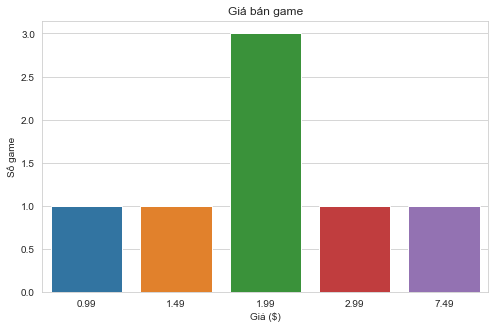

In [281]:
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style("whitegrid")
sns.countplot(x='price',data = df_paid)
plt.xlabel('Giá ($)')
plt.ylabel('Số game')
plt.title('Giá bán game')
plt.show()

- Các nhà phát hành game đều lựa chọn áp dụng chiến lược cài giá đuôi 9.
- Các game trả phí có giá giao động từ 1 usd đến 3 usd . Phổ biến nhất là mức giá 2 usd với 3 tựa games.
- Minecraft là tựa game đặc biệt với mức giá lên đến 7.5 usd, cao hơn ba lần so với các games còn lại.

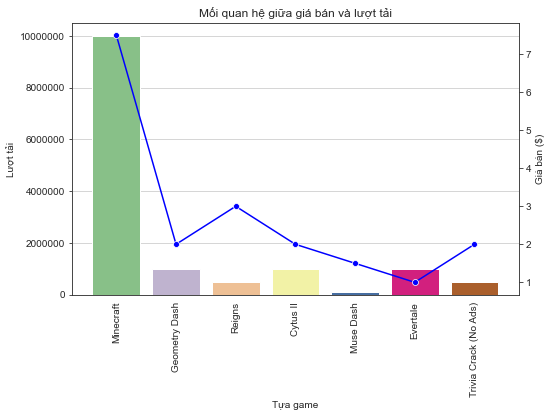

In [282]:
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style("white")
sns.barplot(x='title',y='installs',data = df_paid, palette='Accent')
plt.xlabel('Tựa game')
plt.ylabel('Lượt tải')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
ax2 = plt.twinx()
sns.lineplot(x ='title',y='price',data = df_paid, color="blue", marker='o')
plt.xticks(rotation=90)
plt.ylabel('Giá bán ($)')
plt.title('Mối quan hệ giữa giá bán và lượt tải')
plt.show()

- Từ bảng, ta có thể thấy **không có mối liên hệ giữa mức giá và số lượt mua (lượt tải)** của các games. Game rẻ chưa chắc đã nhiều lượt tải và game đắt chưa chắc đã ít người mua.
- Lượt tải game trả phí phụ thuộc nhiều hơn vào các yếu tố khác (chất lượng game, marketing, fanbase,...) thay vì giá.